In [1]:
%matplotlib inline
pd.options.display.max_columns = 50

In [4]:
%cd nba

/Users/sinsanghun/nba


In [5]:
%ls

0001.csv  0304.csv  0607.csv  0910.csv  1213.csv  1516.csv  9899.csv
0102.csv  0405.csv  0708.csv  1011.csv  1314.csv  1617.csv  9900.csv
0203.csv  0506.csv  0809.csv  1112.csv  1415.csv  9798.csv


### 20개의 시즌 데이터를 불러와 리스트에 넣는다.

In [13]:
year1 = ["97", "98", "99", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16" ]
year2 = ["98", "99", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17" ]

season = []
for i in range(20):
    season.append(year1[i] + year2[i])
    
season        

['9798',
 '9899',
 '9900',
 '0001',
 '0102',
 '0203',
 '0304',
 '0405',
 '0506',
 '0607',
 '0708',
 '0809',
 '0910',
 '1011',
 '1112',
 '1213',
 '1314',
 '1415',
 '1516',
 '1617']

In [14]:
df = []
for i in season:
    df.append(pd.read_csv(i+".csv"))

In [17]:
df[0].head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Mahmoud Abdul-Rauf\abdulma02,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,0.2,1.0,0.161,3.2,7.8,0.405,0.386,0.5,0.5,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3
1,2,Tariq Abdul-Wahad\abdulta01,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,0.1,0.3,0.211,2.4,5.7,0.414,0.409,1.4,2.1,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4
2,3,Shareef Abdur-Rahim\abdursh01,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,15.8,0.488,0.493,6.1,7.8,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3
3,4,Cory Alexander\alexaco01,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,1.1,2.9,0.375,1.8,3.7,0.469,0.510,1.3,1.7,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1
4,4,Cory Alexander\alexaco01,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,0.5,1.7,0.313,1.1,2.2,0.494,0.483,0.7,1.0,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5


----------------

### 변수설명 
MP : 경기당 출전 시간(분) <br/>
3P : 경기당 성공시킨 3점슛 평균 갯수 <br/>
3PA : 경기당 3점슛 시도 평균 갯수 <br/>
3P% : 3점 성공률 <br/>
2P, FT(free throw)도 같은 맥락<br/>
eFG% : 3점슛이 2점슛보다 1점 더 가치가 있으므로 그에 해당되는 부분을 조정한 슛 성공률 <br/>
TRB : 평균 리바운드 갯수 = ORB(공격리바운드) + DRB(수비리바운드)<br/>
AST : 평균 어시스트 갯수 <br/>
STL : 평균 스틸 갯수 <br/>
BLK : 평균 블락 갯수 <br/>
TOV : 평균 턴오버 갯수 <br/>
PF : 경기당 평균 파울 갯수 <br/>
PS/G : 경기당 평균 득점 <br/>


### 포지션을 분류를 해보기 위한 작업이므로 이름이나 팀, 나이 같은 관련 없는 변수는 제거한다

In [75]:
for i in range(20):
    df[i] = df[i][["Pos", "GS", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%",
          "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PS/G"]]

### 20년 동안의 데이터를 합친다

In [76]:
temp = df[0]

# 9798 ~ 1516 년도 데이터를 train set으로 쓰고 
# 1617 데이터를 test set으로 사용하자 

for i in range(18):
    temp = pd.concat([temp, df[i+1]])
    
temp.shape

(10739, 24)

In [77]:
# index 정렬 
position = temp.set_index(np.arange(len(temp)))

In [78]:
position.groupby(["Pos"]).mean()

,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
Pos,,,,,,,,,,,,,,,,,,,,,,,
...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014 Draft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015 All-Star Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015 NBA Playoffs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9:56PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Active Assists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charlotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dan Crawford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### C, PF, SF, SG, PG 를 빼고는 제외한다.

In [79]:
position2 = position[(position["Pos"] == "C") | (position["Pos"] == "PF") |(position["Pos"] == "SF") | (position["Pos"] == "SG") |(position["Pos"] == "PG")]

In [80]:
position2.groupby("Pos").mean()

,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
Pos,,,,,,,,,,,,,,,,,,,,,,,
C,23.222379,2.450823,5.025435,0.469526,0.041749,0.137377,0.137089,2.407757,4.885802,0.473750,0.472836,1.270992,1.912271,0.641324,1.544194,3.128256,4.669958,0.761636,0.412553,0.803902,0.995157,2.146356,6.212506
PF,21.384721,2.914227,6.303019,0.449944,0.257457,0.772278,0.218071,2.656450,5.530055,0.466383,0.468251,1.440210,2.022919,0.688527,1.414135,3.153843,4.566880,1.061665,0.541034,0.512855,1.059515,2.030787,7.524611
PG,22.004125,2.865765,6.878048,0.400487,0.673602,1.970807,0.307922,2.192805,4.908570,0.429156,0.447467,1.425665,1.799267,0.772949,0.398533,1.671265,2.066774,3.498442,0.795646,0.117094,1.467369,1.598900,7.825069
SF,24.236735,3.089031,7.116633,0.418108,0.665765,1.896378,0.309683,2.424133,5.219337,0.448795,0.464912,1.511276,1.983469,0.735043,0.833214,2.474337,3.305816,1.449541,0.681684,0.326582,1.112347,1.759898,8.352551
SG,22.481192,3.166927,7.497118,0.407545,0.814704,2.302101,0.320264,2.351783,5.196385,0.439808,0.461223,1.575183,1.990669,0.763491,0.534099,1.904446,2.436541,1.869126,0.714167,0.200147,1.178847,1.612799,8.721544


### 시각화를 통해 포지션별 기본 스탯 비교

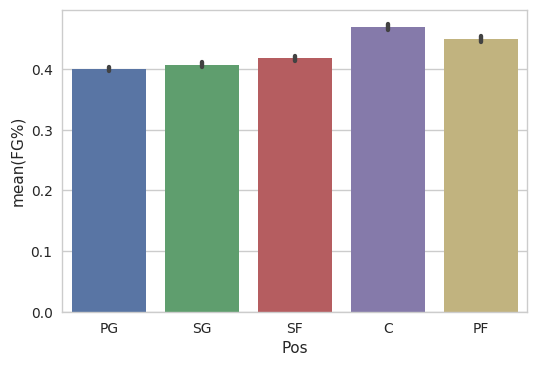

In [117]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="FG%", data=position2)
plt.show()

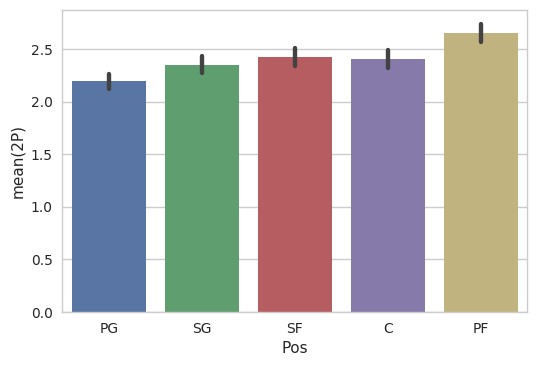

In [105]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="2P", data=position2)
plt.show()

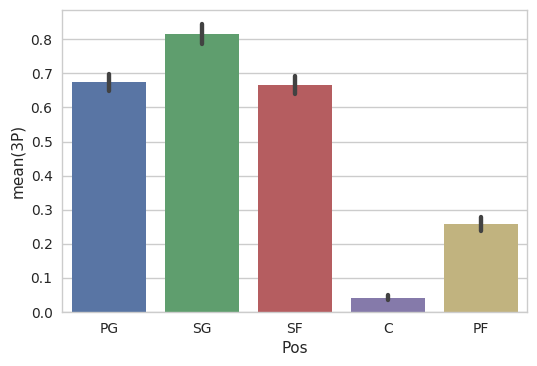

In [103]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="3P", data=position2)
plt.show()

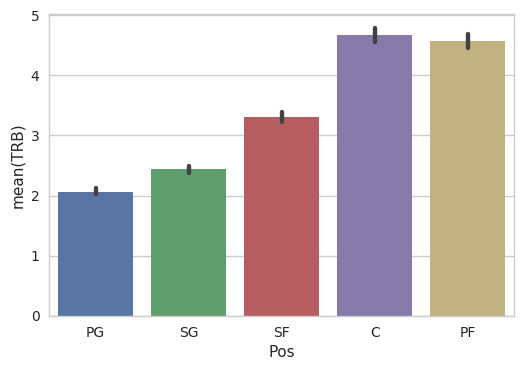

In [93]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="TRB", data=position2)
plt.show()

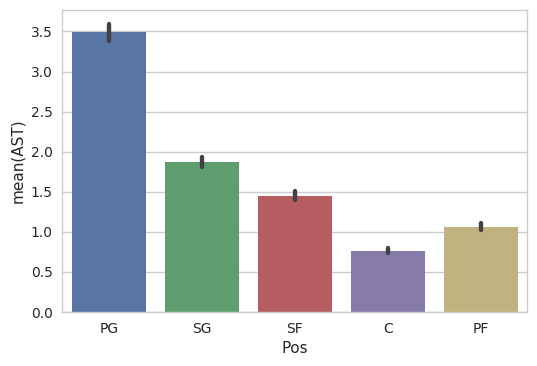

In [88]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="AST", data=position2)
plt.show()

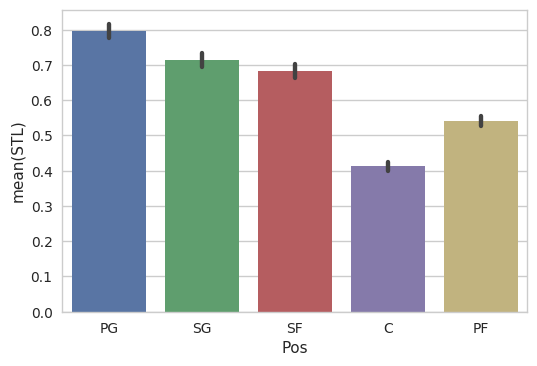

In [89]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="STL", data=position2)
plt.show()

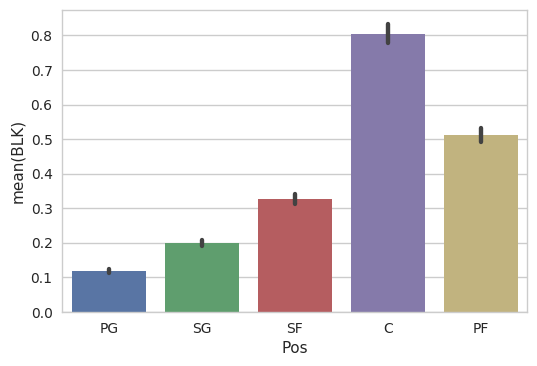

In [90]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="BLK", data=position2)
plt.show()

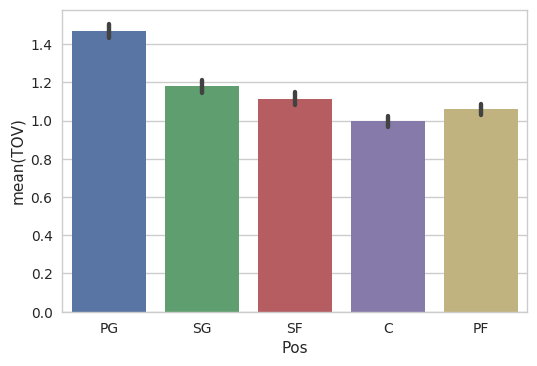

In [94]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="TOV", data=position2)
plt.show()

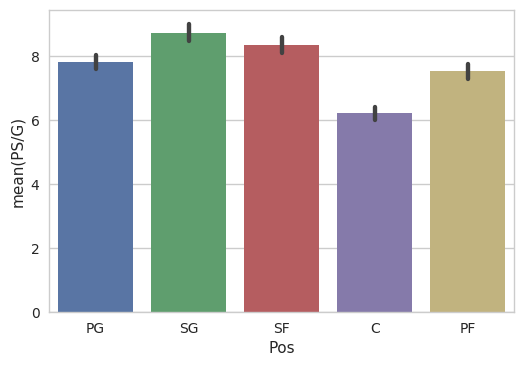

In [95]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="PS/G", data=position2)
plt.show()

### null 값 처리 

일단은 결측값이 하나라도 있는 row들은 모두 제거한다 

In [119]:
position3 = position2.dropna()
position3.isnull().sum()

Pos     0
GS      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PS/G    0
dtype: int64

In [120]:
dfy = position3[["Pos"]]
dfX = position3.iloc[:,1:]

In [127]:
test = df[19].dropna()

In [174]:
test = test[(test["Pos"] == "C") | (test["Pos"] == "PF") \
                     |(test["Pos"] == "SF") | (test["Pos"] == "SG") |(test["Pos"] == "PG")]

In [175]:
test_y = test[["Pos"]]
test_X = test.iloc[:,1:]

### 나이브 베이지안(multinomial)로 분류 

In [176]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB().fit(dfX, dfy)

In [177]:
clf.classes_

array(['C', 'PF', 'PG', 'SF', 'SG'],
      dtype='|S2')

In [178]:
clf.class_count_

array([ 1051.,  1579.,  2042.,  1776.,  1930.])

In [179]:
clf.predict_proba([test_X.iloc[8,:]])

array([[ 0.31988089,  0.60139348,  0.00534023,  0.05997642,  0.01340898]])

In [180]:
test_y.iloc[8,:]["Pos"]

'PF'

In [181]:
clf.predict_proba([test_X.iloc[38,:]])

array([[ 0.00057995,  0.04771129,  0.29247028,  0.1778003 ,  0.48143819]])

In [182]:
test_y.iloc[38,:]["Pos"]

'SG'

In [183]:
clf.predict_proba([test_X.iloc[25, :]])

array([[ 0.00414383,  0.10535058,  0.45641463,  0.13556336,  0.29852759]])

In [184]:
test_y.iloc[25,:]["Pos"]

'PG'

In [185]:
pred = []
pos = ["C", "PF", "PG", "SF", "SG"]
for i in range(len(test_X)):
    pred.append(pos[clf.predict_proba([test_X.iloc[i, :]]).argmax()])

In [186]:
from sklearn.metrics import confusion_matrix

y_true = test_y
y_pred = pred
confusion_matrix(y_true, y_pred)

array([[23, 40,  0,  7,  4],
       [13, 38,  0, 33, 24],
       [ 0,  1, 77,  3, 34],
       [ 4,  8,  3, 40, 57],
       [ 1,  6, 11, 24, 79]])

In [188]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          C       0.56      0.31      0.40        74
         PF       0.41      0.35      0.38       108
         PG       0.85      0.67      0.75       115
         SF       0.37      0.36      0.37       112
         SG       0.40      0.65      0.50       121

avg / total       0.52      0.48      0.49       530

